In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('data_0.txt',header=None,names=('Projection','Dose'))

In [21]:
from scipy import stats
med=np.median(df["Dose"])
mad=stats.median_abs_deviation(df["Dose"])
#mad=df['Dose'].std()
print(med,mad)

5291.0 17.0


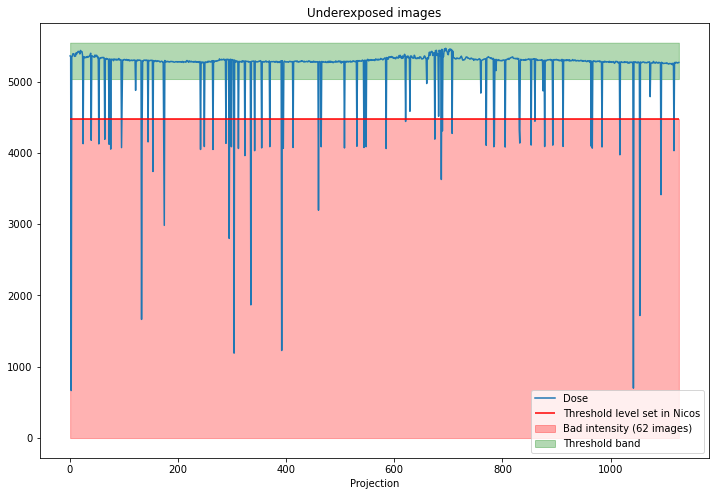

In [22]:
k=15
fig,ax=plt.subplots(1,figsize=(12,8))
df.plot(x='Projection',y='Dose',ax=ax);
refDose=df['Dose'].median()
thDose= refDose*1100.0/1300.0
ax.hlines([thDose],xmin=df['Projection'].min(),xmax=df['Projection'].max(),color='r',label="Threshold level set in Nicos")
ax.fill_between(x=df['Projection'],y1=thDose,alpha=0.3,color='r',label='Bad intensity ({} images)'.format(len(df[df['Dose']<thDose])));

ax.fill_between(x=df['Projection'],y1=med-k*mad,y2=med+k*mad,alpha=0.3,color='g',label='Threshold band');



ax.legend()
ax.set_title('Underexposed images')
plt.savefig('underexposed.svg')
plt.savefig('underexposed.pdf')
plt.savefig('underexposed.png',dpi=300)

In [32]:
df[df['Dose']<thDose].head()

,Projection,Dose
2,3,666
24,25,4129
39,40,4177
53,54,4126
64,65,4190


In [7]:
mad

17.0